PREDICTING STAR,GALAXY OR QUASARS
since the target prediction is categorical we will bw using classificstion model 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("skyserver.csv")

In [5]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


UNDERSTANDING COLUMNS

objid = OBJECT ID
ra = right ascension 
dec = declination
u,g,r,i,z = filter bands
run,rerun,camcol,field = describes the fields
specobjid = 
redshift = change in wavelength due to motion of astronomical object
plate — plate number
mjd — modified Julian date of observation
fiberid — optic fiber ID



In [5]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

In [6]:
df.shape

(10000, 18)

In [7]:
df.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


we can observe 10 columns are float, 7 integers and class column is object type

In [9]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [10]:
df.isnull().values.any()

False

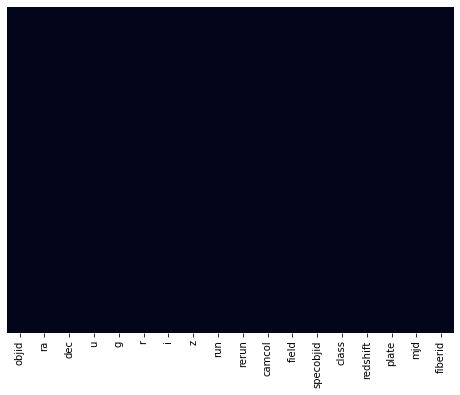

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

we find no null or NaN values in the dataset

In [12]:
df.nunique().to_frame().transpose()


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1,10000,10000,9730,9817,9852,9890,9896,23,1,6,703,6349,3,9637,487,355,892


we can observe the number unique items in each column,ths shows us the columns which is categorical

In [6]:
df['class']=df['class'].map({'STAR':0,'GALAXY':1,'QSO':2})

In [7]:
df['class'].dtypes

dtype('int64')

In [8]:
df['class'].unique()

array([0, 1, 2], dtype=int64)

        we will convert target column into categorical type by marking STAR =0,GALAXY=1,QSO=2

SUMMARY STATISTICS

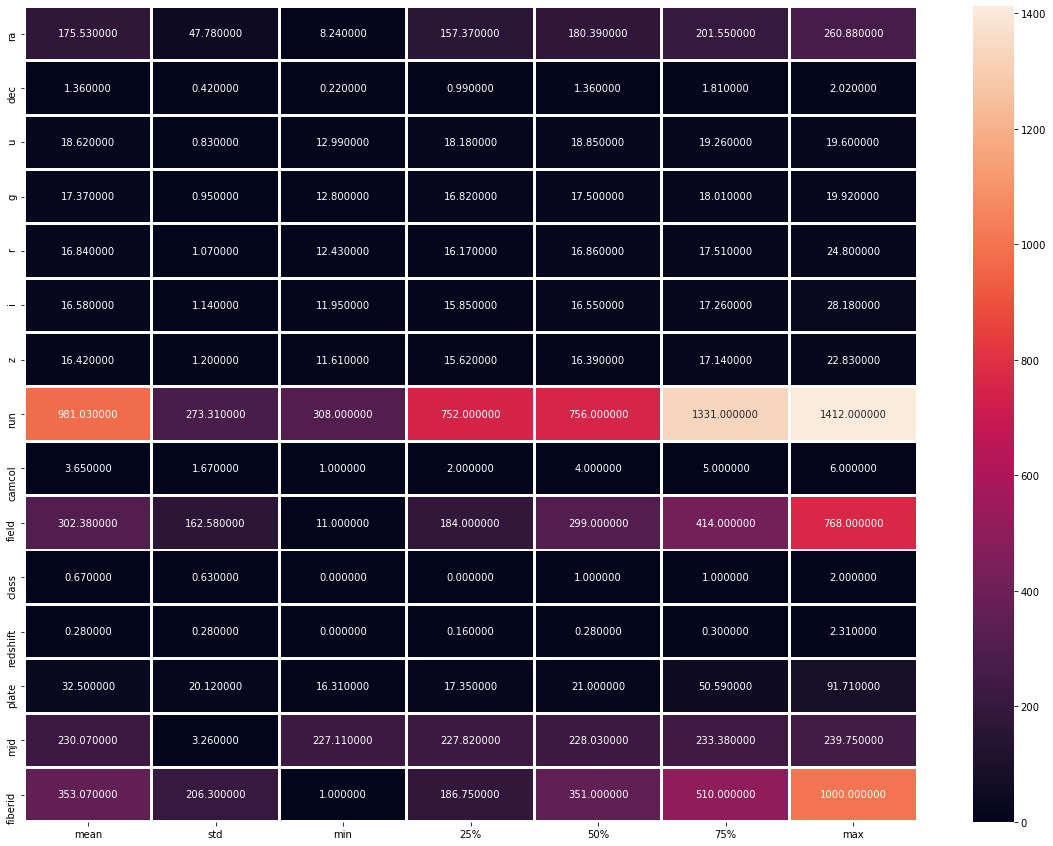

In [118]:
plt.figure(figsize=(20,15))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")

plt.show()

mjd has mean and median normal but mean std has outliers
plate column has normal data while comparing min and Q1,while mean and std,Q3 and max data we find outliers
redshift column is normally distributed except Q3 and max
class column is normally distributed
field mean and median is normaly distributed while mean and std,Q3 and max has data disbursed
z,i,r,g,u has data normally distributed but mean and std has outliers

while observing fiberid their huge difference between min and Q1 also Q3 and max 

In [119]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'class',
       'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

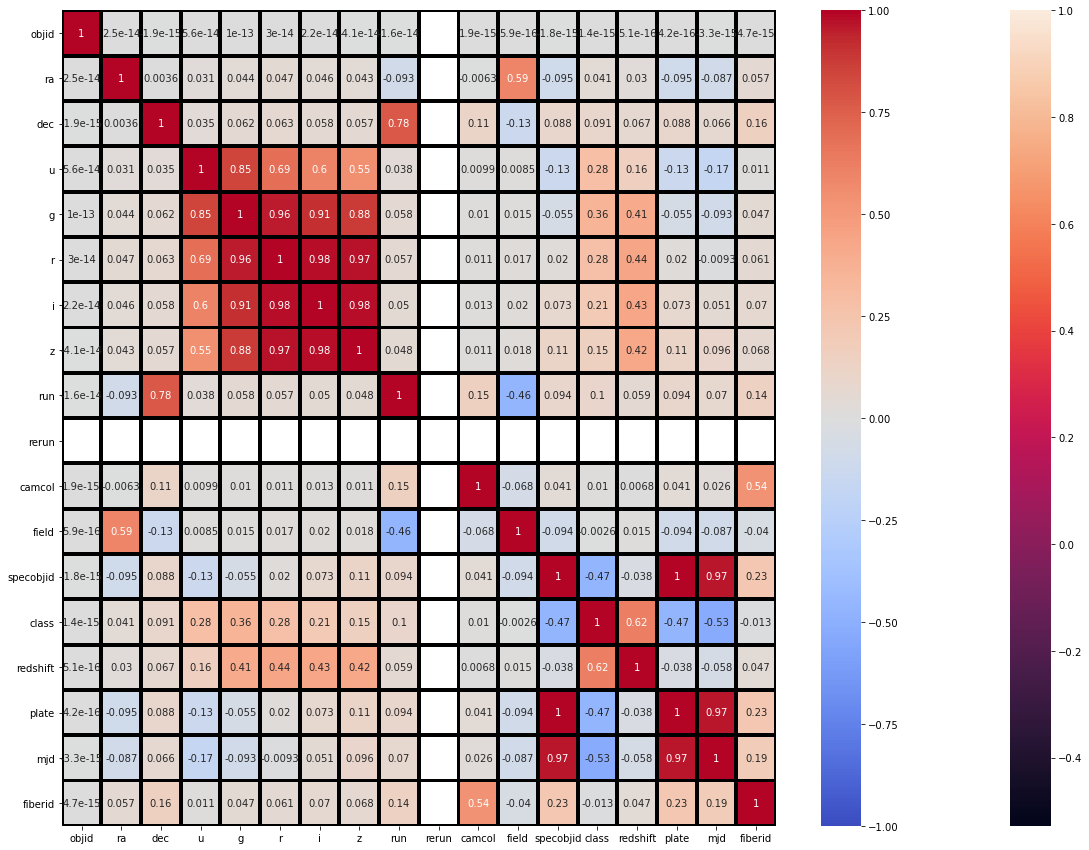

In [17]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

WE have already observed while understanding the columns return attribute has only category and doesnot change on any class of output
further looking into those atributes effecting class column
g=31%
redshift=62%
u&r=28%

negatively high correlation is found in
specobjid=-47%
plate= -47%
mjd=-53%




checking correlation with target variables

Text(0.5, 1.0, 'correlation with target variables')

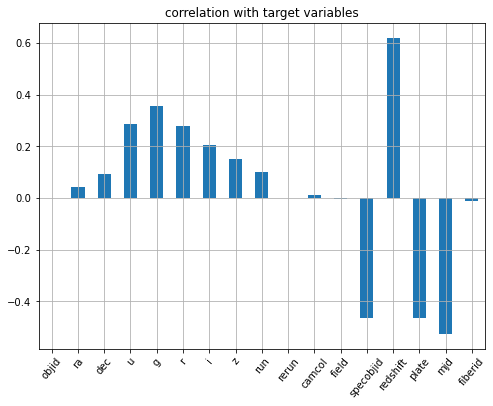

In [18]:
plt.figure(figsize=(8,6))
df.drop('class',axis=1).corrwith(df['class']).plot(kind='bar',grid=True)
plt.xticks(rotation=50)
plt.title("correlation with target variables")

we can observe redshift has high correlation of 62% followed by
u&rwith 28%
g is 31%
Incase of high negative correlation is in 
specobjid correlated to class with -47%
mjid is -47%
plate with -53%

low correlation is found in 
ra
dec
csmcol and fiberid columns

DATA VISUALIZATION

our feature variable of interest is class 
STAR = 0
GALAXY=1
QSO= 2
we have already categorized it 

UNIVARIATE ANALYSIS

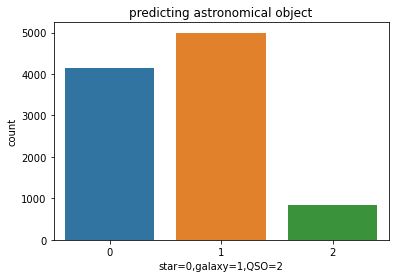

In [19]:
plt.subplot
plt.figure(figsize=(6,4))
sns.countplot(x="class",data=df)
plt.title("predicting astronomical object")
plt.xlabel('star=0,galaxy=1,QSO=2')
plt.ylabel("count")
plt.show()



we can understand the galaxy in total astronomical population 

In [20]:
df['class'].value_counts()

1    4998
0    4152
2     850
Name: class, dtype: int64

we can observe galaxy category is more in number follwed by star with 4998 and 4152 respectively

In [22]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

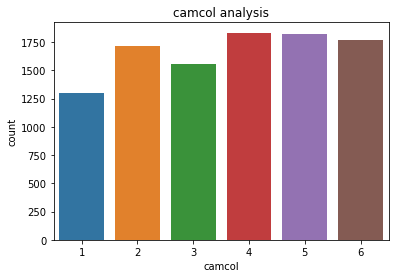

In [23]:
plt.subplots(figsize=(6,4))
sns.countplot(x='camcol',data=df)
plt.title("camcol analysis")
plt.xlabel('camcol')
plt.ylabel('count')
plt.show()

In [24]:
df['camcol'].value_counts()

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64

The field camcol is divided into 6 categories of which type 4 is of highest number which counts 1834
while 5 & 6 counts to 1827 & 1769

In [25]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

BIVARIATE ANALYSIS

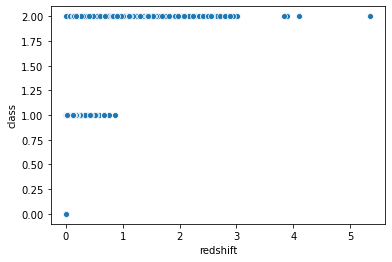

In [26]:
sns.scatterplot(x="redshift",y="class",data=df)

class varient is named as 'star=0,galaxy=1,QSO=2',distribution of redshift is high in QSO 

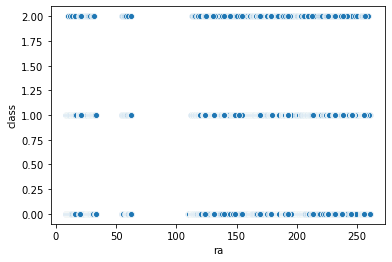

In [27]:
sns.scatterplot(x="ra",y="class",data=df)

Ra is spread among allclasses equaly

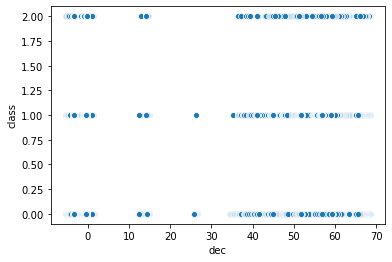

In [28]:
sns.scatterplot(x="dec",y="class",data=df)

In [ ]:
dec is spread among all classes equaly

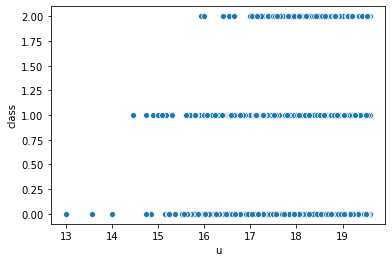

In [29]:
sns.scatterplot(x="u",y="class",data=df)

u is spread among galaxy highly between 15 to 20,but traces ofit is present in 13 to 15 too hence u is present highlyin galaxy

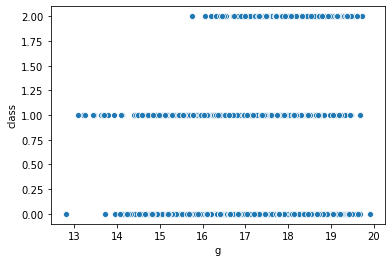

In [30]:
sns.scatterplot(x="g",y="class",data=df)

g is spreada more or in almost complete range in class 'star'while galaxy spread is between 15 to 19 and QSO between 17 to 20

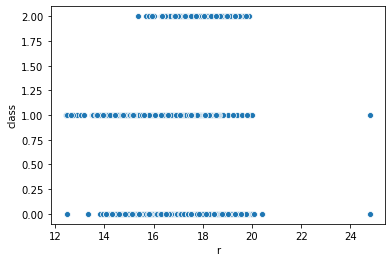

In [31]:
sns.scatterplot(x="r",y="class",data=df)

varient r highlyin star class spread between 12 to 20 equally compared to galaxy 14 to 20 and QSO between 16 to 29

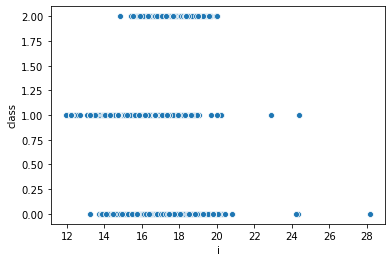

In [32]:
sns.scatterplot(x="i",y="class",data=df)

i is also spread highly in star varient between 12 to 20 while star is between 12 to 21 and QSO between 16 to 20

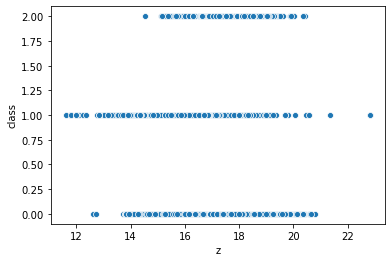

In [33]:
sns.scatterplot(x="z",y="class",data=df)

z varient is present in galaxybetween 12 to 20 n found highest in this class,followed by star beteen 14 to 21while least in QSO

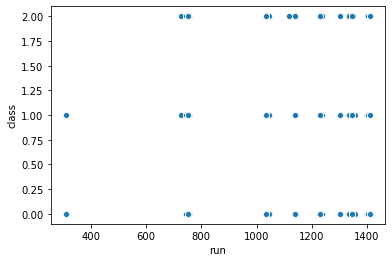

In [34]:
sns.scatterplot(x="run",y="class",data=df)

RUNis spread in similar range amomg all category but whileobserving its density star has highest spread

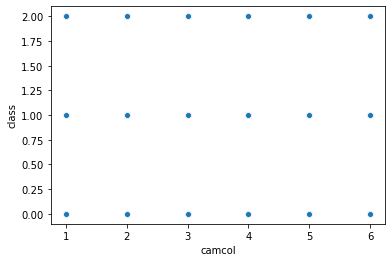

In [35]:
sns.scatterplot(x="camcol",y="class",data=df)


camera column is spread equally among all classes equally

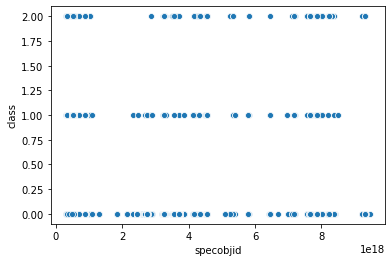

In [36]:
sns.scatterplot(x="specobjid",y="class",data=df)

all classes are spread between 0 to 8 of specobjid but densly in galaxy class

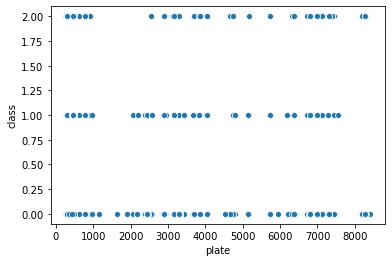

In [38]:
sns.scatterplot(x="plate",y="class",data=df)

plate is found higher in galaxy follwed by QSO and lastly in star

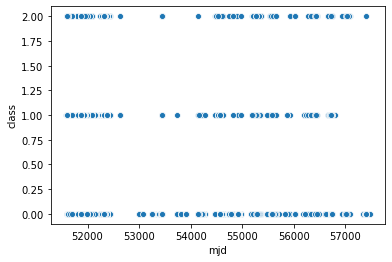

In [39]:
sns.scatterplot(x="mjd",y="class",data=df)

galaxy is found in all range of mjd follwed by QSO


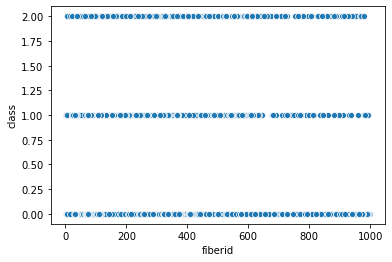

In [40]:
sns.scatterplot(x="fiberid",y="class",data=df)

fiberid is equally among all classes equally


AUMMARY STATISTICS


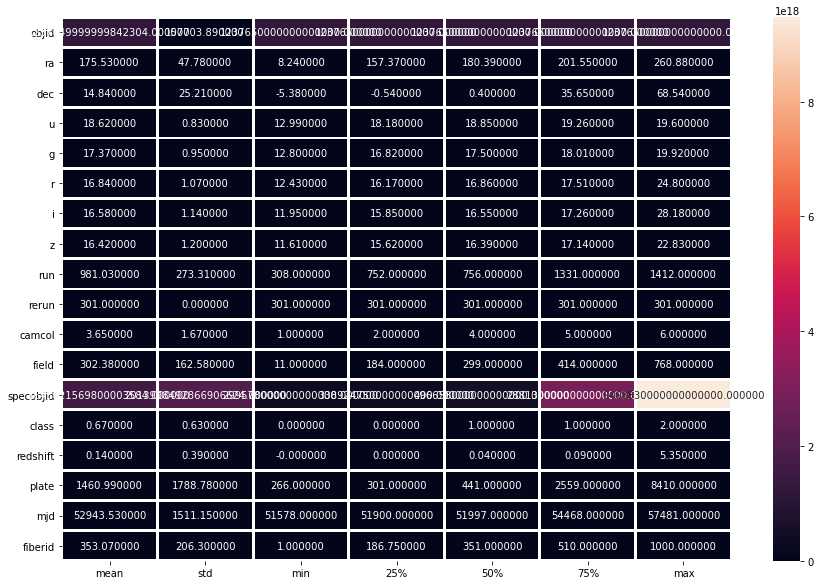

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")

plt.show()

In [ ]:
1.while looking into mean and median data we can observe 
dec,run,plate and mjd has outliers due to which thier is variations 
2.In case mean and std camcol,class,redshift has data normally distributed
3.comparing the data spread between Q3 and max we can understand plate,fiberid,field,i,dec and ra data has deviations


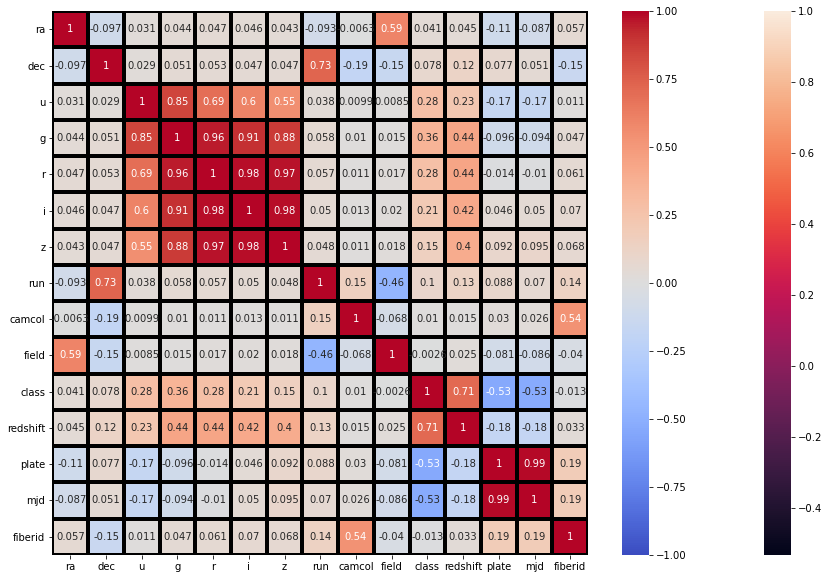

In [122]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

Text(0.5, 1.0, 'correlation with target variables')

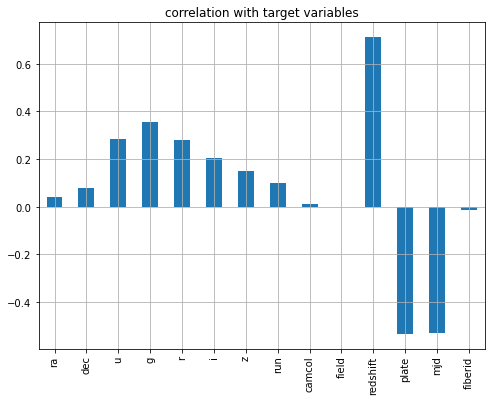

In [125]:
plt.figure(figsize=(8,6))
df.drop('class',axis=1).corrwith(df['class']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("correlation with target variables")

while observing correlation between class and other variables we can understand 
1. highly positive correlation is with redshift=71%
2. we can find positive corrrelation with u,g,r,nd i with 28%,36%,28%,21% respectively
3. while plate and mjd has high negative correlation with class by 53% with both attributes

CHECKING SKEWNESS

In [123]:
df.skew()

ra         -1.227350
dec         0.137505
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.381391
redshift    2.523063
plate       1.093870
mjd         1.025184
fiberid     0.308053
dtype: float64

fiberid,class,field,run g,r,i has no skewness
high skewness is found in redshift,plate,mjd,ra and dec

Treating skewwness

In [9]:
df=df.drop(['rerun','objid','specobjid'], axis = 1)

dropping the columns with id as this figures are representatives of data but has no relation with class decision
rerun has no correlation hence we drop this column

In [10]:
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
            if df[col].skew()<0.55:
                df[col]=np.cbrt(df[col])
            

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [12]:
for column in df.columns:
    if df[column].dtype==np.number:
        continue
        df[column]=le.fit_transform(df[column])

we are converting all the data with object type into int wuth label encoder

PLOTTING OUTLIERS

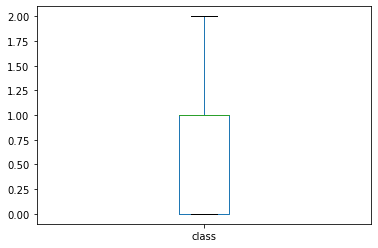

In [59]:
df['class'].plot.box()

no outliers found but min and Q1 has no much difference

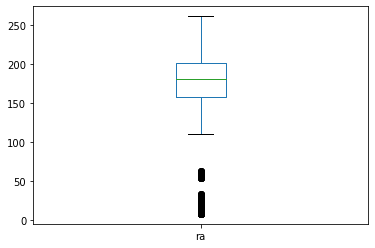

In [61]:
df['ra'].plot.box()

we can observe outliers and its found in range 0 - 60 

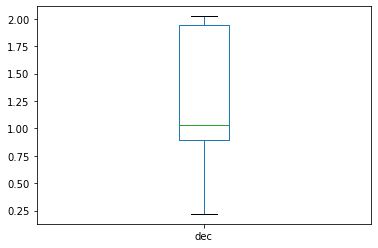

In [62]:
df['dec'].plot.box()

In this figure we can understand their is no outliers,but Q3 and max value the data has less difference

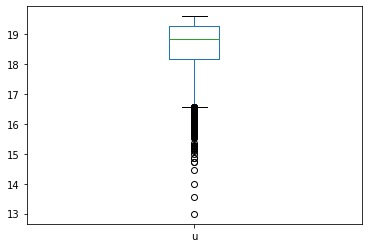

In [63]:
df['u'].plot.box()

in case of u we can observe their is lot of outliers and its found between range 13 to 18

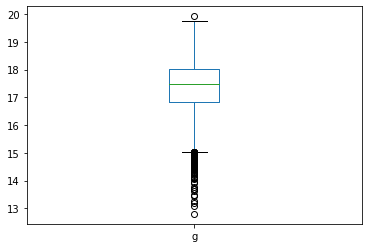

In [64]:
df['g'].plot.box()

we can observe outliers found on both the sides 

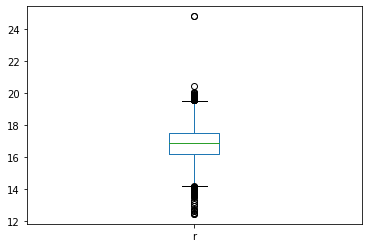

In [65]:
df['r'].plot.box()

we can observe outliers found on both the sides 

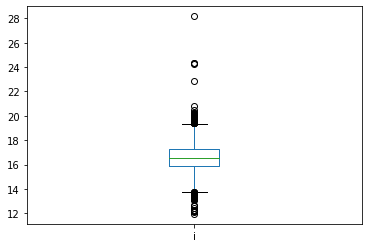

In [66]:
df['i'].plot.box()

we can observe outliers found on both the sides 

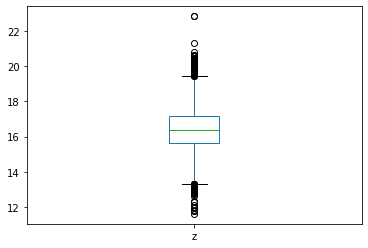

In [67]:
df['z'].plot.box()

we can observe outliers found on both the sides 

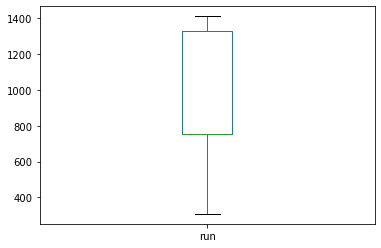

In [68]:
df['run'].plot.box()

thier is no outliers found in run data

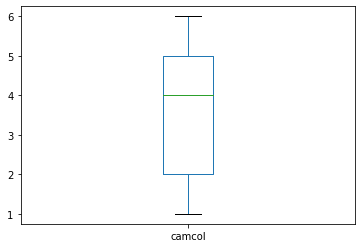

In [69]:
df['camcol'].plot.box()

thier is no outliers found in run data

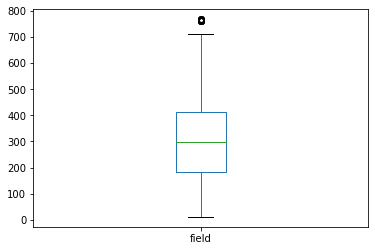

In [70]:
df['field'].plot.box()

Few outliers are found between 700 -800,also data distribution has high variations between Q3 and max data

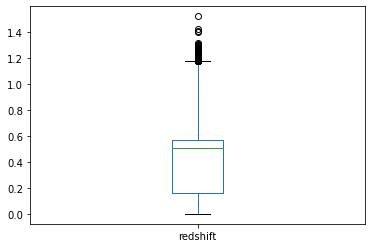

In [71]:
df['redshift'].plot.box()

Few outliers are found between 1.2 - 1.5,also data distribution has high variations between Q3 and max data

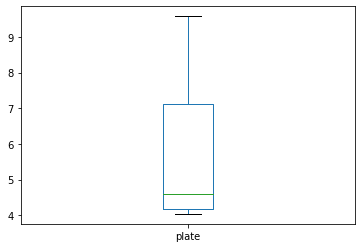

In [73]:
df['plate'].plot.box()

In this data we dont have outliers but data is not normally distributed as it has huge deviation between q3 and max, less difference between q1 and min

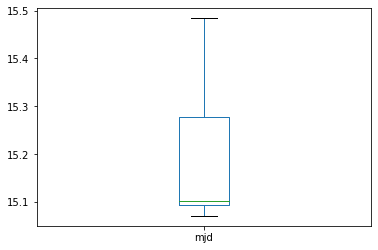

In [74]:
df['mjd'].plot.box()

no outliers found data has less difference between Q1 and min

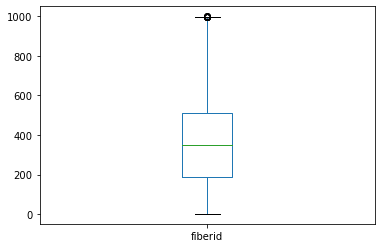

In [75]:
 df['fiberid'].plot.box()

few outliers are found in this data 

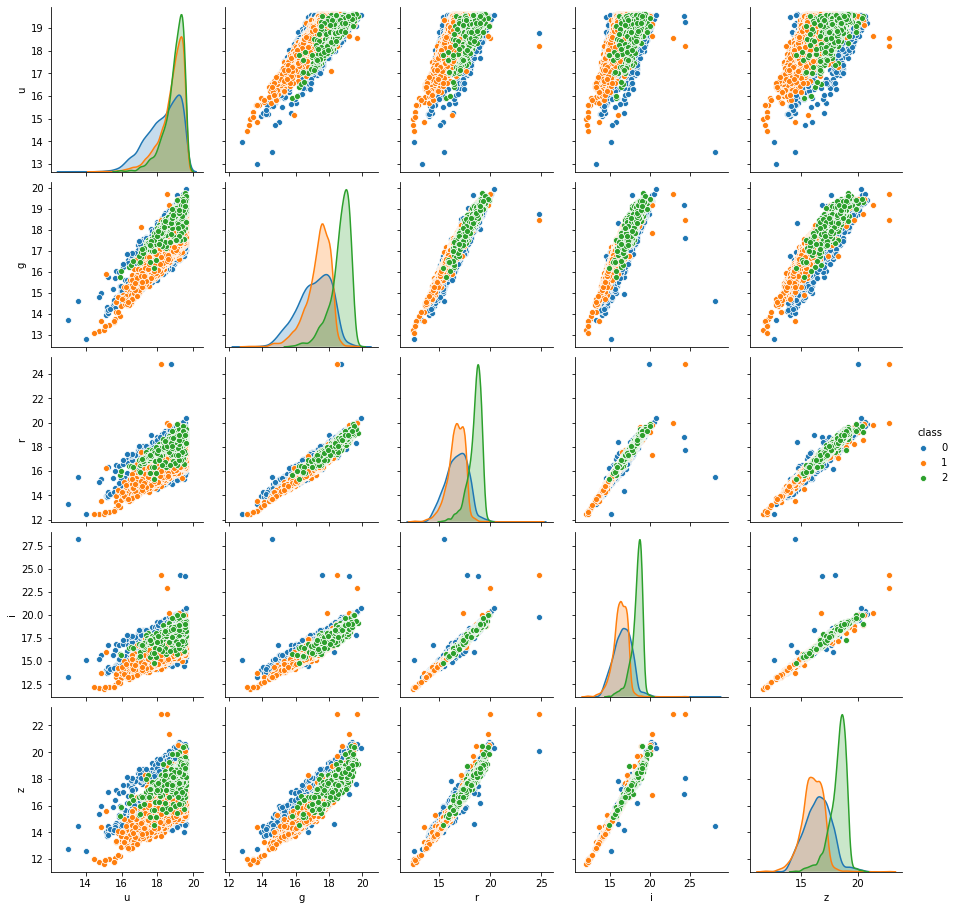

In [76]:
sns.pairplot(df.loc[:,["u","g","r","i","z","class"]],hue="class")
plt.show()

In [ ]:
we can observe the data distribution has skewness while all the data is positively correlated

In [77]:
df.isnull().sum()

ra             0
dec         3774
u              0
g              0
r              0
i              0
z              0
run            0
camcol         0
field          0
class          0
redshift    1919
plate          0
mjd            0
fiberid        0
dtype: int64

In [13]:
df['dec']=df['dec'].fillna((df['dec'].mean()))
df['redshift']=df['redshift'].fillna((df['redshift'].mean()))


REMOVING OUTLIERS

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z
import warnings
warnings.filterwarnings('ignore')

In [15]:
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9929, 9940, 9956], dtype=int64), array([11, 11, 11, ...,  2, 11, 11], dtype=int64))


In [16]:
new_df=df[(z<3).all(axis=1)]

In [17]:
new_df.shape

(9045, 15)

In [18]:
df.shape

(10000, 15)

In [19]:
percentage_loss=((10000-9045)/10000)*100
print(percentage_loss)

9.55


In [20]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

ra           44.176333
dec           0.825577
u             1.081197
g             1.195045
r             1.339343
i             1.404845
z             1.523162
run         579.000000
camcol        3.000000
field       230.000000
class         1.000000
redshift      0.146459
plate        33.237208
mjd           5.568089
fiberid     323.250000
dtype: float64


In [21]:
new_df2=df[~((df<Q1-(1.5*IQR))|(df>(Q3+(1.5*IQR)))).any(axis=1)]
new_df2





,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.669052,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,0,0.283614,57.497826,234.354432,491
1,183.598371,0.716487,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,0,0.283614,17.972201,227.189348,541
2,183.680207,0.708220,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,1,0.350872,16.941074,228.085510,513
3,183.870529,0.606781,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,0,0.283614,57.497826,234.354432,510
4,183.883288,0.684165,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0,0.024297,57.497826,234.354432,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,1.929109,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,1,0.166081,21.142375,227.765230,246
9996,131.306083,1.929930,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,1,0.343180,21.142375,227.765230,228
9997,131.552562,1.929903,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,0,0.283614,85.457592,238.773952,622
9998,131.477151,1.930439,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,1,0.118402,21.142375,227.765230,229


In [22]:
percentage_loss=((10000-6543)/10000)*100
print(percentage_loss)

34.57


In [23]:
new_df.skew()

ra         -0.223254
dec         0.192137
u          -0.974550
g          -0.534742
r          -0.163080
i           0.040758
z           0.146854
run         0.443002
camcol     -0.159708
field       0.229067
class       0.253878
redshift    1.648348
plate       1.118886
mjd         1.041852
fiberid     0.175449
dtype: float64

In [24]:
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

MODEL TRAINING

In [25]:
x=df.drop(columns=['class'],axis=1)
x.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
0,183.531326,0.669052,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,0.283614,57.497826,234.354432,491
1,183.598371,0.716487,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,0.283614,17.972201,227.189348,541
2,183.680207,0.708220,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0.350872,16.941074,228.085510,513
3,183.870529,0.606781,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,0.283614,57.497826,234.354432,510
4,183.883288,0.684165,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0.024297,57.497826,234.354432,512


In [26]:
y=df['class']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

In [28]:
x.shape

(10000, 14)

In [29]:
y.shape

(10000,)

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.16745842, -1.66866856,  1.03148637, ...,  1.24266862,
         1.31369922,  0.66863177],
       [ 0.16886159, -1.55474563,  0.05243046, ..., -0.72236851,
        -0.88404966,  0.91101156],
       [ 0.17057433, -1.57460075,  0.92156796, ..., -0.7736315 ,
        -0.60916958,  0.77527888],
       ...,
       [-0.92039468,  1.35946614,  0.16753826, ...,  2.63270299,
         2.66929998,  1.3036668 ],
       [-0.92197294,  1.36075228,  0.31801835, ..., -0.56476167,
        -0.70740926, -0.60143828],
       [-0.91804124,  1.36153193,  0.79229193, ..., -0.56476167,
        -0.70740926, -0.5820479 ]])

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [32]:
x_train.shape

(8000, 14)

In [33]:
y_train.shape

(8000,)

In [34]:
x_test.shape

(2000, 14)

In [35]:
y_test.shape

(2000,)

importing models and metrics for analysis

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier



from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Finding the best parameters

In [93]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

In [38]:
parameters={'C':[1,10],'random_state':range(50,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)



{'C': 10, 'random_state': 50}


In [ ]:
#lOGISTIC REGRESSION WITH BEST PARAMETERS

In [39]:
lr=LogisticRegression(C=10,random_state=50)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.947
[[771  56   3]
 [ 36 958   6]
 [  0   5 165]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       830
           1       0.94      0.96      0.95      1000
           2       0.95      0.97      0.96       170

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [40]:
#CROSS VALIDATE LOGISTIC REGRESSION

In [41]:
score=cross_val_score(lr,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean :',score.mean())
print('Std:',score.std())

[0.9505 0.959  0.94   0.9345 0.9545]
Mean : 0.9477
Std: 0.00911372591205156


In [42]:
#USING GRIDSEARCHCV TO FIND OUT THE BEST PARAMETER IN SVM

In [43]:
parameters={'kernel':('linear','rbf','poly','sigmoid'),'C':[1,10],'random_state':range(50,70)}
svc=SVC()

In [44]:
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'kernel': 'linear', 'random_state': 50}


In [49]:
svc=SVC(kernel='linear',C=10,random_state=50)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9685
[[810  20   0]
 [ 32 962   6]
 [  0   5 165]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       830
           1       0.97      0.96      0.97      1000
           2       0.96      0.97      0.97       170

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [50]:
#CROSS VALIDATE SVC

In [51]:
score=cross_val_score(svc,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean :',score.mean())
print('Std:',score.std())

[0.966  0.9735 0.9675 0.9525 0.9695]
Mean : 0.9658000000000001
Std: 0.007110555533852477


In [52]:
#GAUSSIANNB

In [53]:
parameters={'var_smoothing':np.logspace(0,-9,num=100)}
gnb=GaussianNB()

In [54]:
clf=GridSearchCV(gnb,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'var_smoothing': 0.0001873817422860383}


In [57]:
gnb=GaussianNB(var_smoothing=0.0001873817)
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.886
[[673 103  54]
 [ 43 943  14]
 [  4  10 156]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       830
           1       0.89      0.94      0.92      1000
           2       0.70      0.92      0.79       170

    accuracy                           0.89      2000
   macro avg       0.84      0.89      0.86      2000
weighted avg       0.89      0.89      0.89      2000



In [56]:
#CROSS VALIDATE GNB

In [58]:
score=cross_val_score(gnb,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean :',score.mean())
print('Std:',score.std())

[0.898  0.902  0.8765 0.863  0.8945]
Mean : 0.8868
Std: 0.014753304714537705


In [59]:
#DECISION TREE CLASSIFIER

In [66]:
parameters={'criterion' : ("gini",'entropy'),'random_state': range(50,70)}
dt=DecisionTreeClassifier()

In [68]:
clf=GridSearchCV(dt,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'random_state': 52}


In [69]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=52)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.985
[[828   2   0]
 [  3 979  18]
 [  0   7 163]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       0.99      0.98      0.98      1000
           2       0.90      0.96      0.93       170

    accuracy                           0.98      2000
   macro avg       0.96      0.98      0.97      2000
weighted avg       0.99      0.98      0.99      2000



In [77]:
#CROSS VALIDATE DecisionTreeClassifier

In [78]:
score=cross_val_score(dt,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean :',score.mean())
print('Std:',score.std())

[0.9875 0.9885 0.9755 0.9865 0.986 ]
Mean : 0.9848000000000001
Std: 0.004728636167014757


In [70]:
#KNeighborsClassifier()

In [73]:
parameters={'n_neighbors':range(5,12),'leaf_size':range(1,5),'algorithm':('auto','ball_tree','kd_tree','brute')}
knn=KNeighborsClassifier()

In [74]:
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 6}


In [75]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=1,n_neighbors=6)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.92
[[738  90   2]
 [ 43 954   3]
 [  9  13 148]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       830
           1       0.90      0.95      0.93      1000
           2       0.97      0.87      0.92       170

    accuracy                           0.92      2000
   macro avg       0.93      0.90      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [76]:
#CROSS VALIDATE KNeighborsClassifier

In [79]:
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean :',score.mean())
print('Std:',score.std())

[0.9205 0.9305 0.9005 0.8935 0.9095]
Mean : 0.9109
Std: 0.013335666462535733


In [80]:
#RandomForestClassifier()

In [82]:
parameters={'criterion':('gini','entropy'),'n_estimators':range(1,10),'min_samples_leaf':range(1,5),'random_state': range(50,70)}
rf=RandomForestClassifier()

In [83]:
clf=GridSearchCV(rf,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 3, 'n_estimators': 9, 'random_state': 68}


In [90]:
rf=RandomForestClassifier(criterion= 'entropy', min_samples_leaf = 3, n_estimators = 9, random_state= 68)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.985
[[826   4   0]
 [ 10 982   8]
 [  0   8 162]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       830
           1       0.99      0.98      0.98      1000
           2       0.95      0.95      0.95       170

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [ ]:
#CROSS VALIDATE RandomForestClassifier

In [92]:
score=cross_val_score(rf,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean :',score.mean())
print('Std:',score.std())

[0.9855 0.987  0.983  0.972  0.9845]
Mean : 0.9823999999999999
Std: 0.0053609700614721


In [126]:
#plotting confusion matrix for decision tree classifier since it has highest accuracy of 98.5%

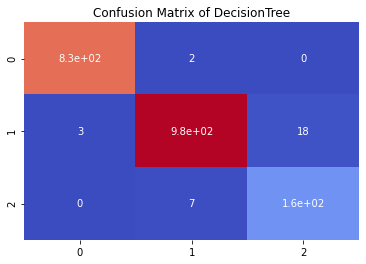

In [103]:
cm=confusion_matrix(y_test,preddt)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title("Confusion Matrix of DecisionTree")
plt.show()

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [99]:
y_pred_prob=dt.predict_proba(x_test)[:,1]
y_pred_prob

array([1., 1., 1., ..., 0., 0., 1.])

we cannot draw auc_roc curve as we have more than two predictions (multiclass variables) 

SERIALIZATION

In [109]:
import pickle
filename='inhouse_SKYSERVER.csv.pkl'

In [110]:
pickle.dump(dt,open(filename,'wb'))

CONCLUSION

In [112]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dt.predict(x_test))

In [113]:
df_final=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [114]:
df_final

,original,predicted
0,1,1
1,1,1
2,2,1
3,1,1
4,1,1
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,0,0


From the above table the model is predicted the values with 98.5% accuracy